In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib notebook

In [2]:
import gmag.arrays.carisma as carisma
from gmag import utils
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fl = carisma.list_files('GILL','2012-01-01',ndays=4)
fl.head()

In [ ]:
#test download
carisma.download('GILL','2021-02-09',ndays=1)

In [3]:
#test load data
df, df2=carisma.load(['ISLL','GILL'],'2019-01-04',ndays=1,drop_flag=False)

File 20190104ISLL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2019\01\04\20190104ISLL.F01.gz
File 20190104GILL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2019\01\04\20190104GILL.F01.gz


In [3]:
df.head()
df.tail()

,ISLL_X,ISLL_Y,ISLL_Z,ISLL_flag,GILL_X,GILL_Y,GILL_Z,GILL_flag,ISLL_H,ISLL_D,GILL_H,GILL_D
t,,,,,,,,,,,,
2019-01-04 23:59:55,12131.241,50.375,57766.859,.,11618.681,-337.794,58263.056,.,12131.218165,55.602772,11621.839383,-201.748136
2019-01-04 23:59:56,12131.231,50.347,57766.862,.,11618.541,-337.919,58262.922,.,12131.208177,55.574768,11621.700856,-201.874766
2019-01-04 23:59:57,12131.238,50.344,57766.872,.,11618.328,-338.053,58262.828,.,12131.215179,55.571771,11621.489440,-202.011251
2019-01-04 23:59:58,12131.238,50.306,57766.856,.,11618.197,-338.225,58262.759,.,12131.215195,55.533771,11621.360462,-202.184773
2019-01-04 23:59:59,12131.237,50.294,57766.859,.,11617.938,-338.469,58262.691,.,12131.214200,55.521770,11621.104337,-202.431788


In [4]:
df2

,array,code,name,latitude,longitude,cgm_latitude,cgm_longitude,declination,lshell,mlt_midnight,mlt_ut,year,Time Resolution,Coordinates,PI,Institution
0,CARISMA,ISLL,Island Lake,53.856,265.34,63.02717,335.6151,-0.024691,4.860886,6.879090,17.12091,2019,1.0,"Geographic North - X, Eas - Y, Vertical Down -...",Ian Mann,University of Alberta
1,CARISMA,GILL,Gillam,56.376,265.36,65.40524,335.3998,-0.670791,5.772988,6.893449,17.10655,2019,1.0,"Geographic North - X, Eas - Y, Vertical Down -...",Ian Mann,University of Alberta


In [ ]:
res = (pd.Series(df.index[1:]) -
               pd.Series(df.index[:-1])).value_counts()
res = res.index[0].total_seconds()
res

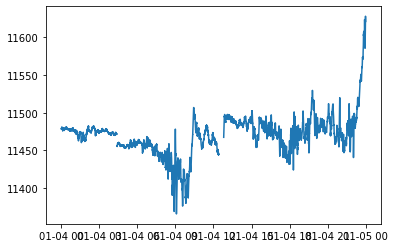

In [5]:
# not you can plot with panda's, however there
#is an issue with determining the x-axis ticks
#which serverly slows plotting and is extremely
#memory intesive
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(df['GILL_H'])

In [ ]:
# Read in all Carisma Data for a particular day
from gmag import utils
car_stn = utils.load_station_coor(param='all',col='array')
car_stn.head()

In [ ]:
stn_cgm = utils.load_station_coor(param='CARISMA',col='array', year=2019)


In [ ]:
stn_dat = stn_cgm[stn_cgm['code'] == 'GILL'].reset_index(drop=True)
dec = float(stn_dat['declination'])

In [ ]:
stn_dat

In [ ]:
geo_stn = utils.load_station_geo(param='all',col='code')
geo_stn

In [ ]:
df=carisma.load(list(car_stn['code']),'2020-01-02',edate='2020-01-05',dl=True)

In [ ]:
stn_dat = geo_stn[geo_stn['code'] == ['GILL','ISLL']]
stn_dat

In [ ]:
col=car_stn.columns


In [ ]:
meta = pd.DataFrame(columns=['array', 'code', 'name', 'latitude', 'longitude', 'cgm_latitude',
       'cgm_longitude', 'declination', 'lshell', 'mlt_midnight', 'mlt_ut',
       'year'])

In [ ]:
meta = pd.concat([meta,geo_stn],axis=0, sort=False)
meta

In [ ]:
plt.plot(df['FCHU_X'])